# **ANOVA**

## **Penjelasan ANOVA**

**ANOVA** (Analysis of Variance) adalah metode statistik untuk menguji apakah terdapat perbedaan yang signifikan antara rata-rata dua atau lebih kelompok. ANOVA membandingkan variansi antar-kelompok dengan variansi dalam-kelompok.

**Hipotesis dalam ANOVA:**
- H0 (hipotesis nol): Semua rata-rata populasi adalah sama
- H1 (hipotesis alternatif): Setidaknya ada satu rata-rata populasi yang berbeda

**Asumsi dasar ANOVA:**
- Data tiap kelompok berdistribusi normal
- Homogenitas variansi (varian sama di tiap kelompok)
- Observasi independen satu sama lain

## **ANOVA Satu Arah** 

**ANOVA satu arah** digunakan ketika kita ingin menguji pengaruh satu faktor kategorikal terhadap sebuah variabel numerik.

**Contoh**

Apakah jenis metode belajar memengaruhi nilai ujian siswa?

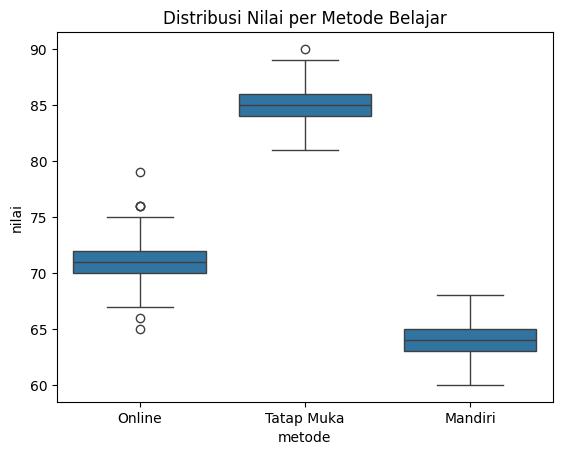

Statistik Deskriptif:
             count       mean       std   min   25%   50%   75%   max
metode                                                              
Mandiri     333.0  64.108108  1.511112  60.0  63.0  64.0  65.0  68.0
Online      334.0  71.062874  1.954190  65.0  70.0  71.0  72.0  79.0
Tatap Muka  333.0  84.957958  1.514400  81.0  84.0  85.0  86.0  90.0

Uji ANOVA:
                sum_sq     df             F  PR(>F)
C(metode)  75058.92484    2.0  13405.304274     0.0
Residual    2791.19916  997.0           NaN     NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_1a = pd.read_csv("../datasets/satu_arah.csv")

sns.boxplot(x="metode", y="nilai", data=data_1a)
plt.title("Distribusi Nilai per Metode Belajar")
plt.show()

# Statistik Deskriptif
print("Statistik Deskriptif:\n", data_1a.groupby('metode')['nilai'].describe())

print("\nUji ANOVA:")
model_1a = ols('nilai ~ C(metode)', data=data_1a).fit()
anova_1a = sm.stats.anova_lm(model_1a, typ=2)
print(anova_1a)

**Interpretasi:**
- Nilai F-statistik yang sangat tinggi (13,405.30) menunjukkan bahwa variasi antar kelompok jauh lebih besar dibanding variasi dalam kelompok.
- p-value = 0.0 (lebih kecil dari α = 0.05) berarti kita menolak hipotesis nol (H₀).
  
Terdapat perbedaan yang signifikan antara rata-rata nilai pada ketiga metode belajar (Mandiri, Online, Tatap Muka). Artinya, metode belajar memang memiliki pengaruh nyata terhadap performa nilai siswa.